In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import precision_score
from sklearn.tree import export_graphviz
from sklearn.metrics import recall_score
import os

df=pd.read_csv("HR_comma_sep.csv")

In [2]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
satisfaction_level       14999 non-null float64
last_evaluation          14999 non-null float64
number_project           14999 non-null int64
average_montly_hours     14999 non-null int64
time_spend_company       14999 non-null int64
Work_accident            14999 non-null int64
left                     14999 non-null int64
promotion_last_5years    14999 non-null int64
Department               14999 non-null object
salary                   14999 non-null object
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [4]:
print(df.shape)

(14999, 10)


In [5]:
df.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
Department               0
salary                   0
dtype: int64

In [6]:
df.salary=df.salary.map({'low':-1,'medium':0,'high':1})


In [7]:
df['department2']=df.Department.map({'sales':0,'accounting':1,'hr':2,'technical':3,'support':4,'management':5,'IT':6,'product_mng':7,'marketing':8,'RandD':9})

In [8]:
df.department2

0        0
1        0
2        0
3        0
4        0
        ..
14994    4
14995    4
14996    4
14997    4
14998    4
Name: department2, Length: 14999, dtype: int64

In [9]:
df["salary"].describe()

count    14999.000000
mean        -0.405294
std          0.637183
min         -1.000000
25%         -1.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: salary, dtype: float64

In [10]:
print(df.shape)


(14999, 11)


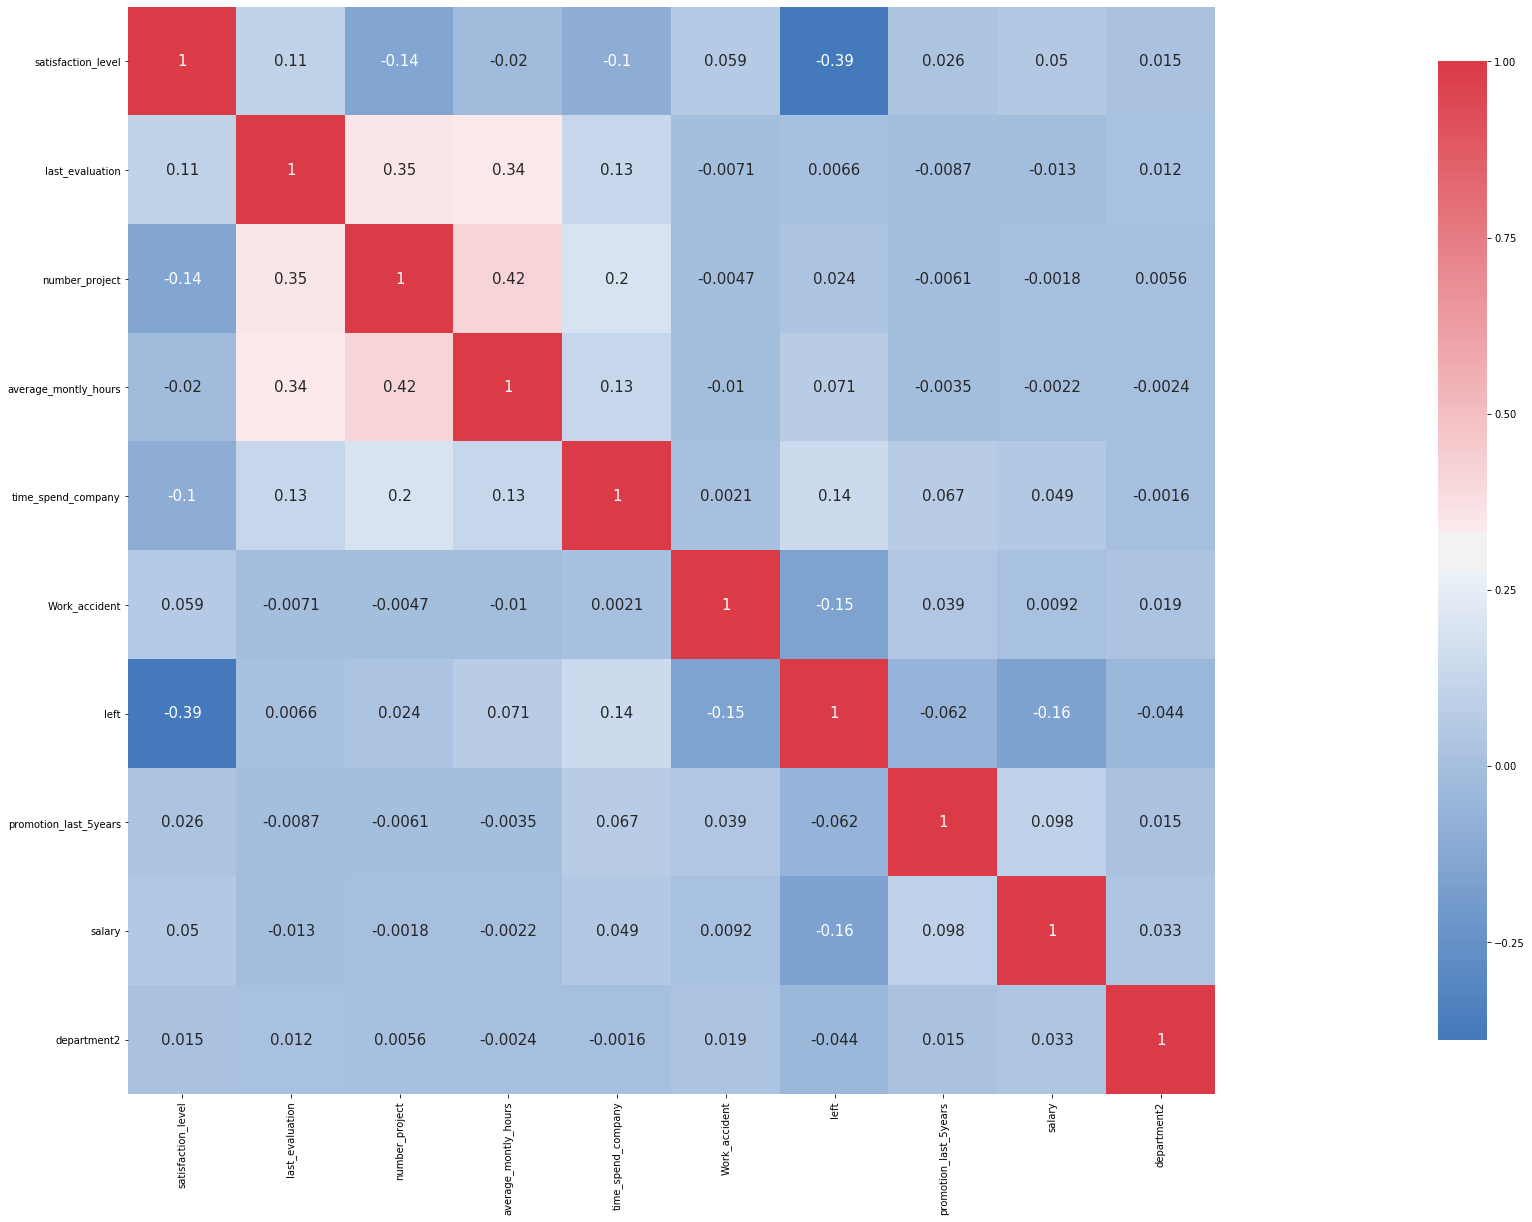

In [11]:

     
def plot_correlation_map( df ):
    corr = df.corr()#donne un tableau qui donne la valeur du correlation des colone deux a deux
    s , h = plt.subplots( figsize =( 80 , 20 ) )#
    balha = sns.diverging_palette( 250 , 10 , as_cmap = True )#ta3ti alwen degradée
  #bach yamel matrix faha l cor wyabliki 3laha lalwan athoukom  
    s = sns.heatmap(
        corr, #datafare libach nzaynoha
        cmap = balha, 
        square=True,#est ce qqque nesta3mlou corr walla 
        cbar_kws={ 'shrink' : .9 },#kobr ta3 bande 3la jnab 
        ax=h, 
        annot = True, #famma ktiba wala
        annot_kws = { 'fontsize' : 15 }
        )
plot_correlation_map(df)

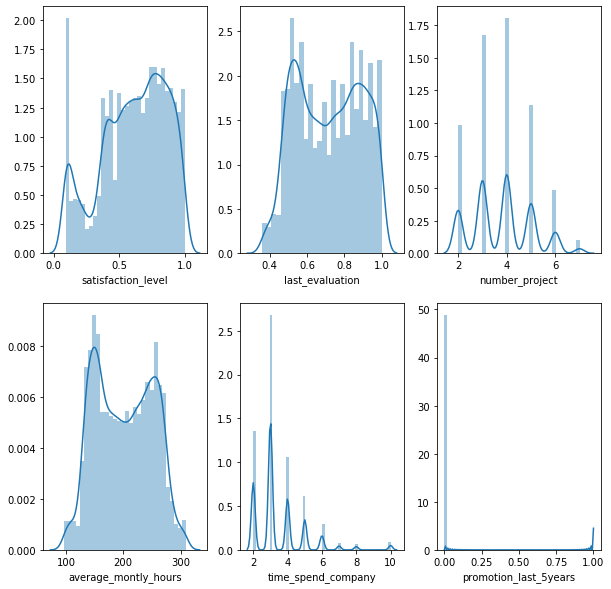

In [12]:
fig,ax = plt.subplots(2,3, figsize=(10,10))               # 'ax' has references to all the four axes
sns.distplot(df['satisfaction_level'], ax = ax[0,0]) 
sns.distplot(df['last_evaluation'], ax = ax[0,1]) 
sns.distplot(df['number_project'], ax = ax[0,2]) 
sns.distplot(df['average_montly_hours'], ax = ax[1,0]) 
sns.distplot(df['time_spend_company'], ax = ax[1,1]) 
sns.distplot(df['promotion_last_5years'], ax = ax[1,2])
 
plt.show()

In [73]:
#fig = plt.figure(figsize=(15,7))
#sns.countplot(x='left',data=df)
#plt.show()

#pie

In [68]:
df.left.value_counts()

0    11428
1     3571
Name: left, dtype: int64

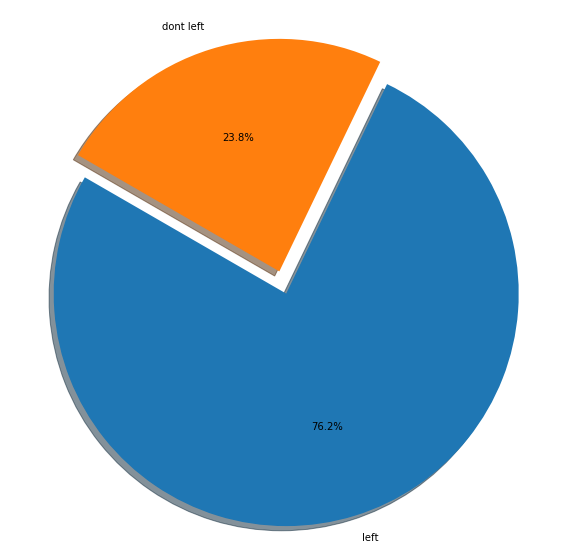

In [72]:
counts_left=[11428,3571]
department_left=['left','dont left']
explode=[0,0.1]
fig1, ax1 = plt.subplots(figsize=(10,10))
ax1.pie(counts_left, explode=explode,labels=department_left, autopct='%1.1f%%',
        shadow=True, startangle=150)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

In [64]:
#fig = plt.figure(figsize=(15,7))
#sns.countplot(x='Department',data=df)
#plt.show()

### -1 low salary 0 medium salary 1 high salary

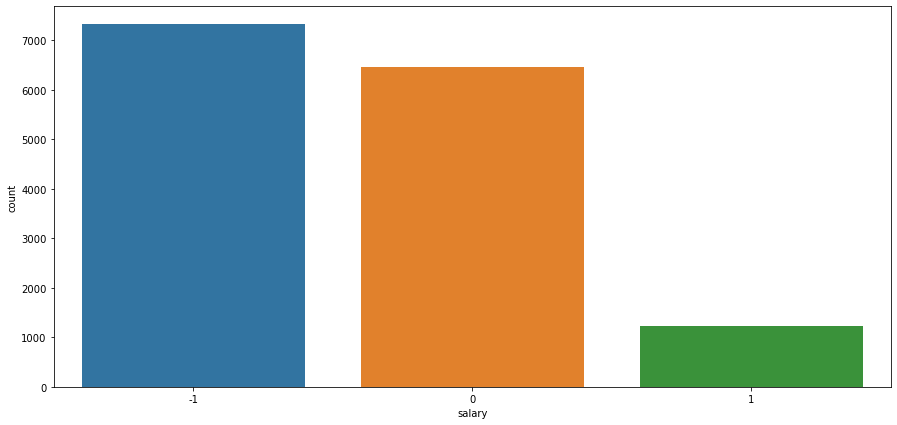

In [15]:
fig = plt.figure(figsize=(15,7))
sns.countplot(x='salary',data=df)
plt.show()

C:\Users\Achraf\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


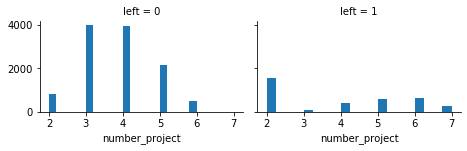

In [16]:
grid=sns.FacetGrid(df,col='left',size=2.2,aspect=1.5)
grid.map(plt.hist,'number_project',bins=20)

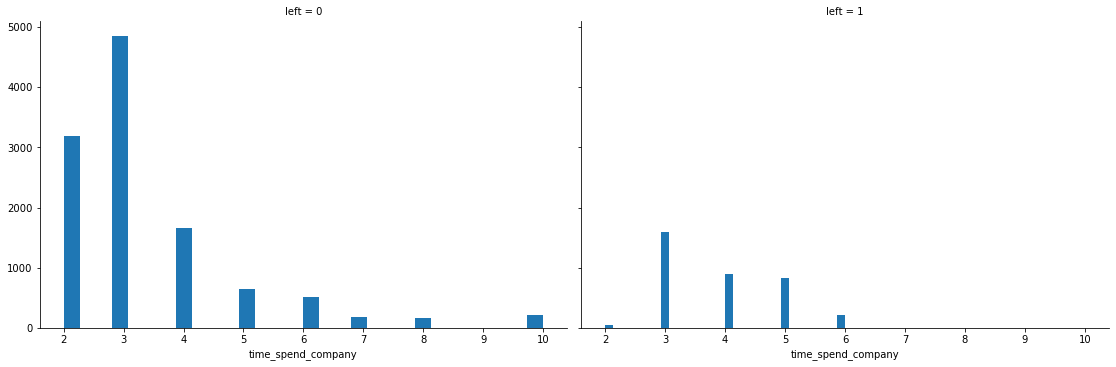

In [17]:

grid=sns.FacetGrid(df,col='left',size=5.2,aspect=1.5)
grid.map(plt.hist,'time_spend_company',bins=30)

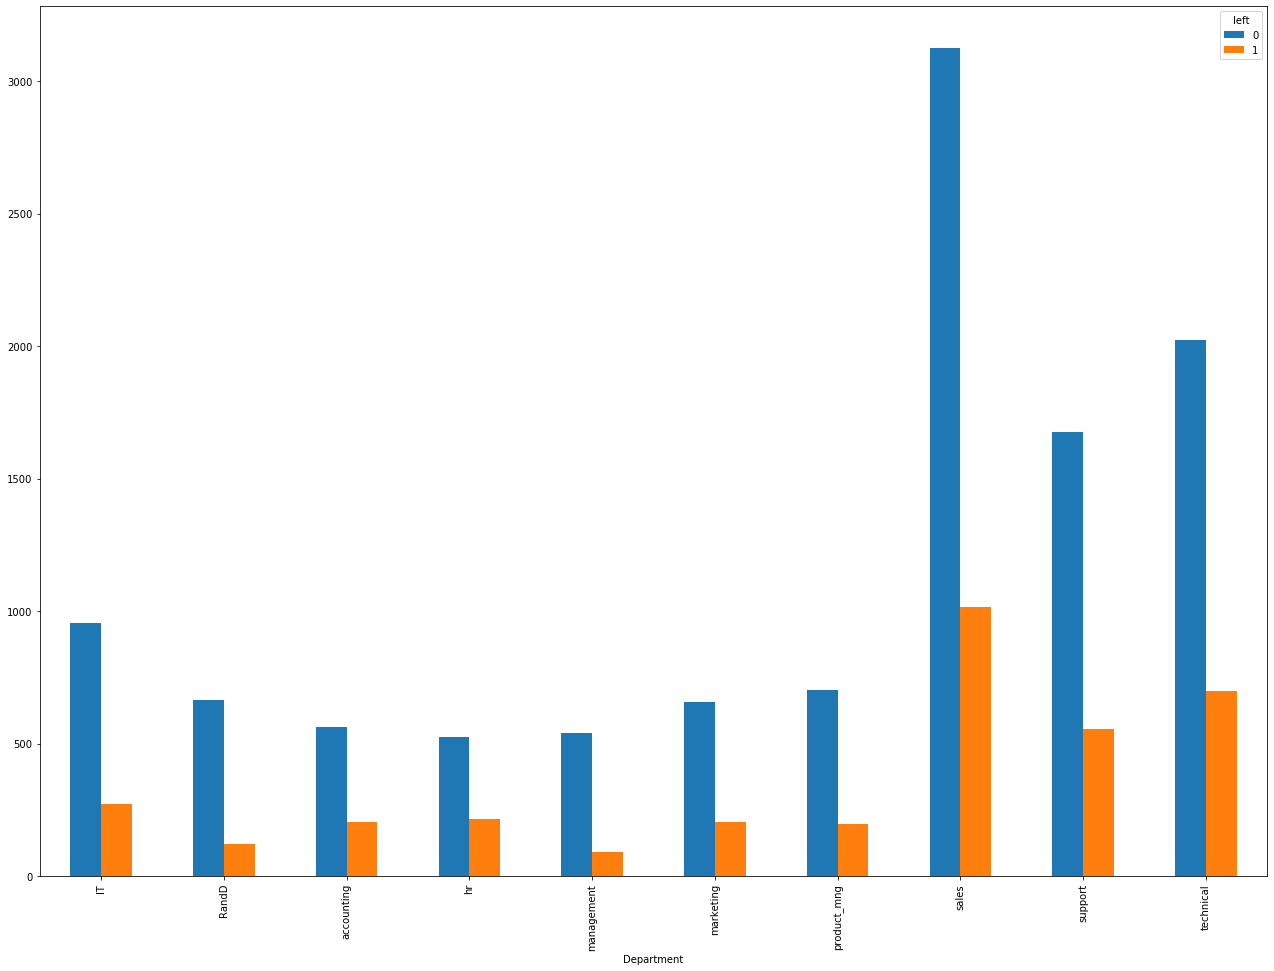

In [18]:
pd.crosstab(df.Department,df.left).plot(kind='bar', figsize=(22,16))

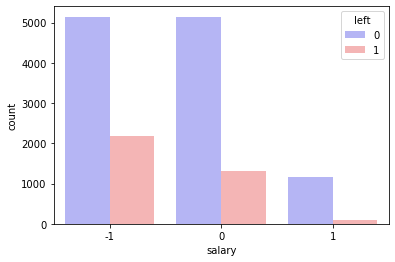

In [19]:
sns.countplot(data = df, x = 'salary', hue ='left',palette = 'bwr')

In [46]:
df2=df[df['left']==1]

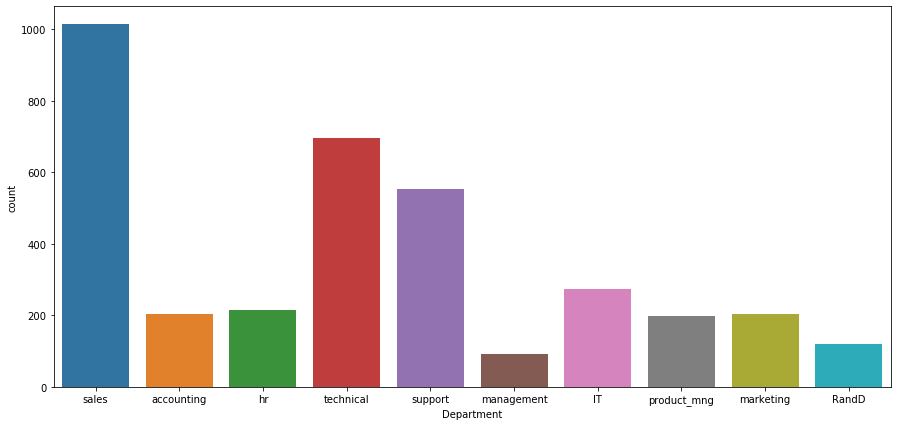

In [47]:
fig = plt.figure(figsize=(15,7))
sns.countplot(x='Department',data=df2)
plt.show()

In [61]:
df2['department2'].value_counts()

0    1014
3     697
4     555
6     273
2     215
1     204
8     203
7     198
9     121
5      91
Name: department2, dtype: int64

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 11 columns):
satisfaction_level       14999 non-null float64
last_evaluation          14999 non-null float64
number_project           14999 non-null int64
average_montly_hours     14999 non-null int64
time_spend_company       14999 non-null int64
Work_accident            14999 non-null int64
left                     14999 non-null int64
promotion_last_5years    14999 non-null int64
Department               14999 non-null object
salary                   14999 non-null int64
department2              14999 non-null int64
dtypes: float64(2), int64(8), object(1)
memory usage: 1.3+ MB


In [25]:
df3=df.drop('Department',axis=1)

In [26]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
satisfaction_level       14999 non-null float64
last_evaluation          14999 non-null float64
number_project           14999 non-null int64
average_montly_hours     14999 non-null int64
time_spend_company       14999 non-null int64
Work_accident            14999 non-null int64
left                     14999 non-null int64
promotion_last_5years    14999 non-null int64
salary                   14999 non-null int64
department2              14999 non-null int64
dtypes: float64(2), int64(8)
memory usage: 1.1 MB


In [27]:
x=df3[['satisfaction_level','last_evaluation','number_project','average_montly_hours','time_spend_company','Work_accident','promotion_last_5years','department2','salary']]
y=df3[['left']].values

In [28]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test =train_test_split(x,y,test_size=0.20,random_state=42)


In [29]:
import pandas as pd
import xgboost as xgb
import numpy as np
from sklearn.model_selection import GridSearchCV

turnover = xgb.DMatrix(data=x_train,label=y_train)

gbm_param_grid = {'learning_rate': [0.01,0.1,0.5,0.9],
'n_estimators': [200],
'subsample': [0.3, 0.5, 0.9],"max_depth":[2,3,4,5],'colsample_bytree':[0.1,0.3,.0,8,0.9,0.15]}

gbm = xgb.XGBClassifier()
grid_mse = GridSearchCV(estimator=gbm,param_grid=gbm_param_grid,
scoring='accuracy', cv=4, verbose=1)
grid_mse.fit(x, y)
print("Best parameters found: ",grid_mse.best_params_)
print("best accuracy found: ", np.sqrt(np.abs(grid_mse.best_score_)))

Fitting 4 folds for each of 288 candidates, totalling 1152 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\Achraf\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Achraf\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Achraf\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
xgboost.core.XGBoostError: value 8 for Parameter colsample_bytree exceed bound [0,1]

  FitFailedWarning)
[Parallel(n_jobs=1)]: Done 1152 out of 1152 | elapsed: 

Best parameters found:  {'colsample_bytree': 0.9, 'learning_rate': 0.5, 'max_depth': 5, 'n_estimators': 200, 'subsample': 0.9}
best accuracy found:  0.9932098535081683


In [32]:
from sklearn import metrics
reg_xgb = xgb.XGBClassifier(learning_rate=0.5,n_estimators=200, subsample=0.9,max_depth=5,colsample_bytree=0.9)
reg_xgb.fit(x_train, y_train)

pred_xgb = reg_xgb.predict(x_test)
print('xgb_accuracy: {:.3f}'.format(metrics.accuracy_score(y_test, pred_xgb)))

xgb_accuracy: 0.987


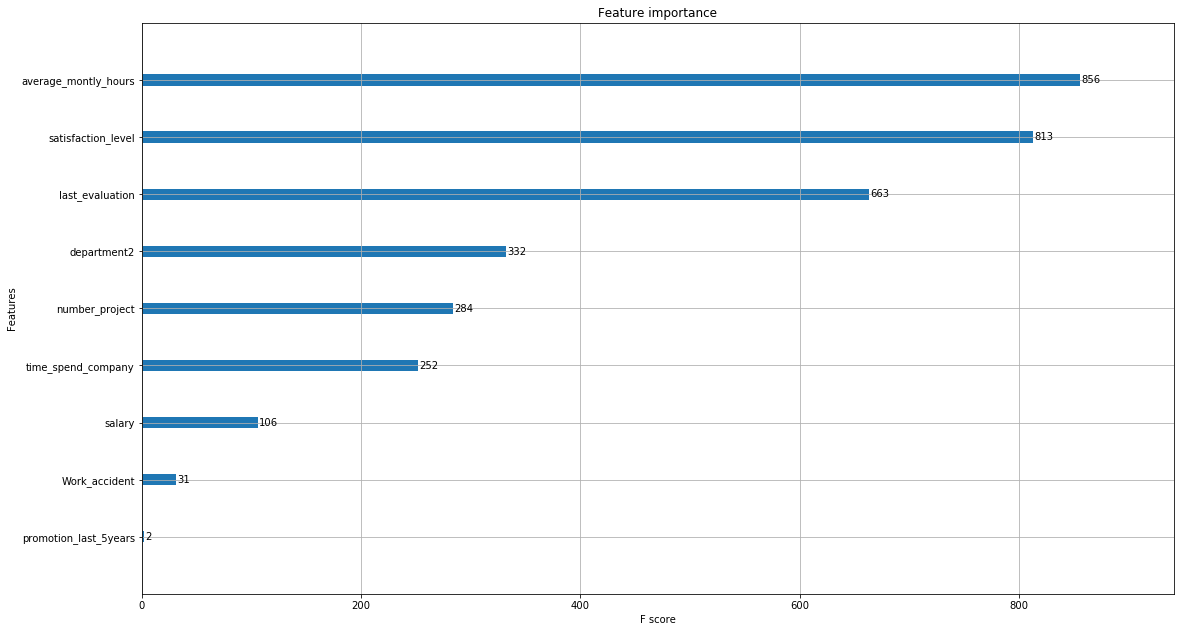

In [33]:
xgb.plot_importance(reg_xgb)
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
plt.show()


## average_mounthly_hours 

In [49]:
df2.average_montly_hours.any

<bound method Series.any of 0        157
1        262
2        272
3        223
4        159
        ... 
14994    151
14995    160
14996    143
14997    280
14998    158
Name: average_montly_hours, Length: 3571, dtype: int64>

In [50]:
df2.average_montly_hours.mean()

207.41921030523662

In [51]:
import seaborn as sns

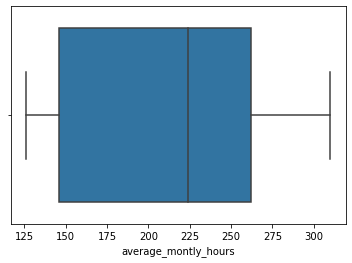

In [111]:
sns.boxplot(df2['average_montly_hours'])

In [53]:
df2['average_montly_hours'].describe()

count    3571.000000
mean      207.419210
std        61.202825
min       126.000000
25%       146.000000
50%       224.000000
75%       262.000000
max       310.000000
Name: average_montly_hours, dtype: float64

In [115]:
df5=df[df['left']==0]

In [117]:
df5['average_montly_hours'].describe()

count    11428.000000
mean       199.060203
std         45.682731
min         96.000000
25%        162.000000
50%        198.000000
75%        238.000000
max        287.000000
Name: average_montly_hours, dtype: float64

# the 2nd most important feature ' satisfaction level'

In [75]:
df2.satisfaction_level.describe()

count    3571.000000
mean        0.440098
std         0.263933
min         0.090000
25%         0.130000
50%         0.410000
75%         0.730000
max         0.920000
Name: satisfaction_level, dtype: float64

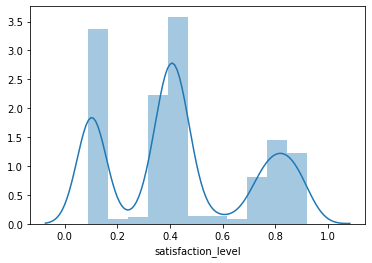

In [108]:
sns.distplot(df2['satisfaction_level'])

In [122]:
df2['satisfaction_level'].describe()

count    3571.000000
mean        0.440098
std         0.263933
min         0.090000
25%         0.130000
50%         0.410000
75%         0.730000
max         0.920000
Name: satisfaction_level, dtype: float64

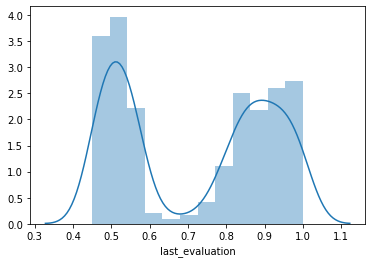

In [109]:
sns.distplot(df2['last_evaluation'])

In [123]:
df2['last_evaluation'].describe()

count    3571.000000
mean        0.718113
std         0.197673
min         0.450000
25%         0.520000
50%         0.790000
75%         0.900000
max         1.000000
Name: last_evaluation, dtype: float64

# the 3rd most important feature is ' Department '

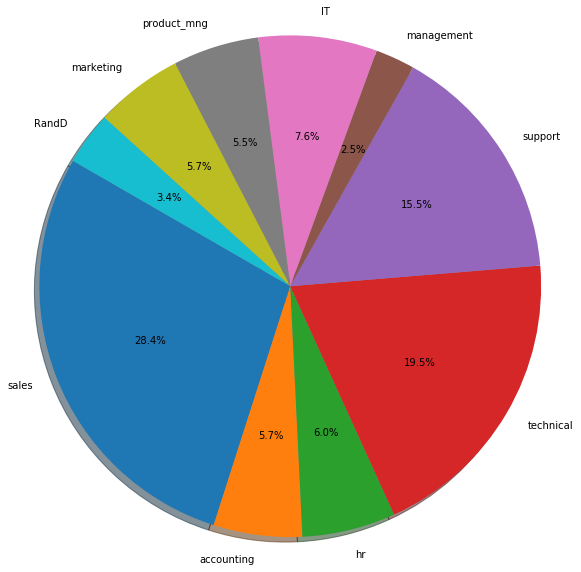

In [113]:
counts=[1014,204,215,697,555,91,273,198,203,121]
department=['sales','accounting','hr','technical','support','management','IT','product_mng','marketing','RandD']
fig1, ax1 = plt.subplots(figsize=(10,10))
ax1.pie(counts, labels=department, autopct='%1.1f%%',
        shadow=True, startangle=150)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

# 'number_project'

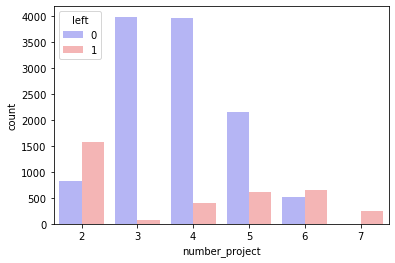

In [118]:
sns.countplot(data = df, x = 'number_project', hue ='left',palette = 'bwr')

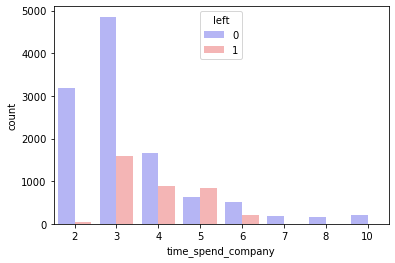

In [126]:
sns.countplot(data = df, x = 'time_spend_company', hue ='left',palette = 'bwr')

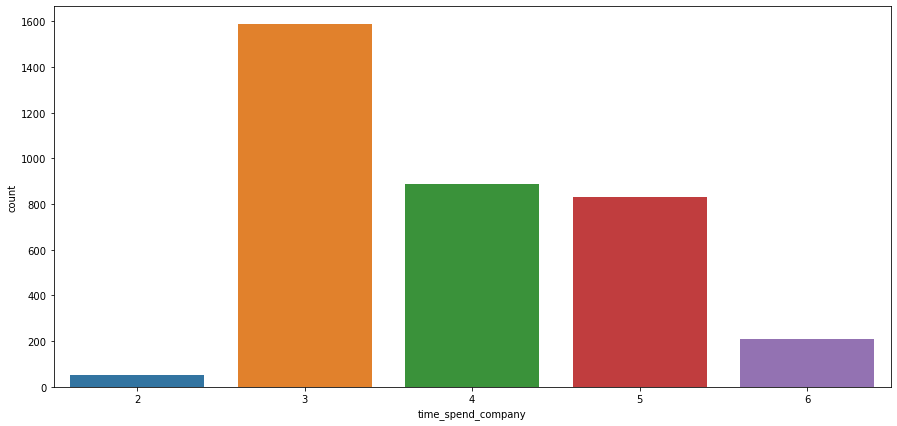

In [127]:
fig = plt.figure(figsize=(15,7))
sns.countplot(x='time_spend_company',data=df2)
plt.show()

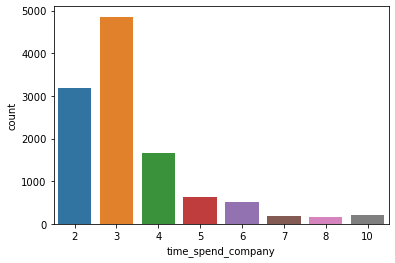

In [128]:
sns.countplot(x='time_spend_company',data=df5)
plt.show()